# Датасэт - квартиры

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
path = 'drive/MyDrive/DS/house/'

In [ ]:
df = pd.read_csv(path+'real_estate_data.csv', sep = '\t')
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [ ]:
df.isnull().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [ ]:
df.is_apartment.value_counts()

False    2725
True       50
Name: is_apartment, dtype: int64

In [ ]:
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


In [ ]:
df[(df['ceiling_height'] < 4) & (df['ceiling_height'] > 2.3)]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.6,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0
10,5,5050000.0,39.60,2017-11-16T00:00:00,1,2.67,12.0,20.3,3,NaN,False,False,8.50,NaN,Санкт-Петербург,38357.0,13878.0,1.0,310.0,2.0,553.0,137.0
13,20,3550000.0,42.80,2017-07-01T00:00:00,2,2.56,5.0,27.0,5,NaN,False,False,5.20,1.0,Петергоф,37868.0,33058.0,1.0,294.0,3.0,298.0,366.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23691,11,9470000.0,72.90,2016-10-13T00:00:00,2,2.75,25.0,40.3,7,NaN,False,False,10.60,1.0,Санкт-Петербург,19424.0,4489.0,0.0,NaN,1.0,806.0,519.0
23693,9,4600000.0,62.40,2016-08-05T00:00:00,3,2.60,9.0,40.0,8,NaN,False,False,8.00,0.0,Петергоф,45602.0,34104.0,1.0,352.0,1.0,675.0,239.0
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,NaN,False,False,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,NaN,12,NaN,False,False,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0


In [ ]:
df = df[(df['ceiling_height'] < 4) & (df['ceiling_height'] > 2.3)]

In [ ]:
mean_ceil_h = df.groupby('locality_name').mean()['ceiling_height']

In [ ]:
cities_list = df.groupby('locality_name').mean()['ceiling_height'].index

In [ ]:
cities_list

Index(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг', 'Высоцк',
       'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       ...
       'посёлок городского типа имени Свердлова',
       'посёлок при железнодорожной станции Вещево',
       'посёлок при железнодорожной станции Приветнинское',
       'посёлок станции Громово', 'садовое товарищество Новая Ропша',
       'садовое товарищество Рахья', 'село Копорье', 'село Павлово',
       'село Путилово', 'село Русско-Высоцкое'],
      dtype='object', name='locality_name', length=281)

In [ ]:
for i, city in enumerate(cities_list):
  df.loc[df['locality_name'] == city]['ceiling_height'].fillna(mean_ceil_h[i], inplace = True)

df  

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.6,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0
10,5,5050000.0,39.60,2017-11-16T00:00:00,1,2.67,12.0,20.3,3,NaN,False,False,8.50,NaN,Санкт-Петербург,38357.0,13878.0,1.0,310.0,2.0,553.0,137.0
13,20,3550000.0,42.80,2017-07-01T00:00:00,2,2.56,5.0,27.0,5,NaN,False,False,5.20,1.0,Петергоф,37868.0,33058.0,1.0,294.0,3.0,298.0,366.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23691,11,9470000.0,72.90,2016-10-13T00:00:00,2,2.75,25.0,40.3,7,NaN,False,False,10.60,1.0,Санкт-Петербург,19424.0,4489.0,0.0,NaN,1.0,806.0,519.0
23693,9,4600000.0,62.40,2016-08-05T00:00:00,3,2.60,9.0,40.0,8,NaN,False,False,8.00,0.0,Петергоф,45602.0,34104.0,1.0,352.0,1.0,675.0,239.0
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,NaN,False,False,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,NaN,12,NaN,False,False,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0


In [ ]:
df.isnull().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                9
living_area               787
floor                       0
is_apartment            12540
studio                      0
open_plan                   0
kitchen_area              923
balcony                  7177
locality_name              13
airports_nearest         2929
cityCenters_nearest      2912
parks_around3000         2911
parks_nearest            9143
ponds_around3000         2911
ponds_nearest            8710
days_exposition          2423
dtype: int64

In [ ]:
#for i, city in enumerate(cities_list):
list(enumerate(cities_list))

[(0, 'Бокситогорск'),
 (1, 'Волосово'),
 (2, 'Волхов'),
 (3, 'Всеволожск'),
 (4, 'Выборг'),
 (5, 'Высоцк'),
 (6, 'Гатчина'),
 (7, 'Зеленогорск'),
 (8, 'Ивангород'),
 (9, 'Каменногорск'),
 (10, 'Кингисепп'),
 (11, 'Кириши'),
 (12, 'Кировск'),
 (13, 'Колпино'),
 (14, 'Коммунар'),
 (15, 'Красное Село'),
 (16, 'Кронштадт'),
 (17, 'Кудрово'),
 (18, 'Лодейное Поле'),
 (19, 'Ломоносов'),
 (20, 'Луга'),
 (21, 'Любань'),
 (22, 'Мурино'),
 (23, 'Никольское'),
 (24, 'Новая Ладога'),
 (25, 'Отрадное'),
 (26, 'Павловск'),
 (27, 'Петергоф'),
 (28, 'Пикалёво'),
 (29, 'Подпорожье'),
 (30, 'Приморск'),
 (31, 'Приозерск'),
 (32, 'Пушкин'),
 (33, 'Санкт-Петербург'),
 (34, 'Светогорск'),
 (35, 'Сертолово'),
 (36, 'Сестрорецк'),
 (37, 'Сланцы'),
 (38, 'Сосновый Бор'),
 (39, 'Сясьстрой'),
 (40, 'Тихвин'),
 (41, 'Тосно'),
 (42, 'Шлиссельбург'),
 (43, 'городской поселок Большая Ижора'),
 (44, 'городской поселок Янино-1'),
 (45, 'городской посёлок Будогощь'),
 (46, 'городской посёлок Виллози'),
 (47, 'городско

In [ ]:
cols = ['airports_nearest', 'cityCenters_nearest']
for col in cols:
  df[col].fillna(0, inplace = True)
#df[['airports_nearest', 'cityCenters_nearest']].fillna(0, inplace = True) # двойные скобки, т.к. без них это series. если бы была одна колонка, то хватило бы 1 скобок
df.isnull().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                9
living_area               787
floor                       0
is_apartment            12540
studio                      0
open_plan                   0
kitchen_area              923
balcony                  7177
locality_name              13
airports_nearest            0
cityCenters_nearest         0
parks_around3000         2911
parks_nearest            9143
ponds_around3000         2911
ponds_nearest            8710
days_exposition          2423
dtype: int64

## Какое распределение имеет Last_Price?

In [ ]:
import matplotlib.pyplot as plt


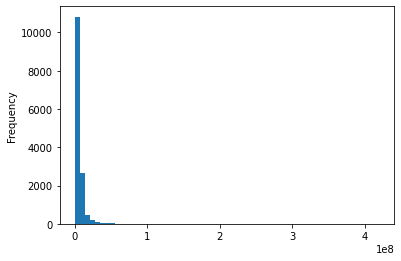

In [ ]:
df['last_price'].plot.hist(bins=60)

* Среднее время продажи
* Мода продажи
* Макс/Мин время продажи
* Графики зависимости цен от площади 
* График зав-ти цен от кол-ва комнат
* Зав-ть между удаленности от центра и ценой
* На каких этажах самые дорогие квартиры (Разделить квартиры на 1-ый этаж, послдений этаж (каким бы он ни был) и другие)
* Влияет ли день недели(Время, когда выложено объявление) на цену? (библиотека calendar)
* Влияет ли день недели на скорость продажи?
* В каком году продавались самые дорогие квартиры? (Вывести графики зав-ти года/месяца от цен)
* Вывести топ10 городов по кол-ву объявлений.
* Вывести среднюю цену по топ10 городам (ср. цена для каждого города) Самый дорогой город - там, где средний прайс в топ10. В порядке убывания
* Ср. цена за километр от центра
* Сравнить цены в центре города (2км от центра) с ценами в общем по городу (включая все цены)

## Среднее время продажи

In [ ]:
# делаем предположение, что если не указано, значит нет
df.is_apartment.fillna(0, inplace = True)
df.balcony.fillna(0, inplace = True)
df.parks_around3000.fillna(0, inplace = True)
df.parks_nearest.fillna(0, inplace = True)
df.ponds_around3000.fillna(0, inplace = True)
df.ponds_nearest.fillna(0, inplace = True)

# удаляем записи, в которых нет информации о городе (таких всего 13 из всего датасэта)
df.dropna(subset = ['locality_name'], inplace = True) 

In [ ]:
df.isna().sum()

total_images               0
last_price                 0
total_area                 0
first_day_exposition       0
rooms                      0
ceiling_height             0
floors_total               9
living_area              787
floor                      0
is_apartment               0
studio                     0
open_plan                  0
kitchen_area             922
balcony                    0
locality_name              0
airports_nearest           0
cityCenters_nearest        0
parks_around3000           0
parks_nearest              0
ponds_around3000           0
ponds_nearest              0
days_exposition         2423
dtype: int64

In [ ]:
df['liv/total'] = df['living_area'] / df['total_area']
df['kitch/total'] = df['kitchen_area'] / df['total_area']
df['liv/total'].fillna(0, inplace = True)
df['kitch/total'].fillna(0, inplace = True)

In [ ]:
df.isna().sum()

total_images               0
last_price                 0
total_area                 0
first_day_exposition       0
rooms                      0
ceiling_height             0
floors_total               9
living_area              787
floor                      0
is_apartment               0
studio                     0
open_plan                  0
kitchen_area             922
balcony                    0
locality_name              0
airports_nearest           0
cityCenters_nearest        0
parks_around3000           0
parks_nearest              0
ponds_around3000           0
ponds_nearest              0
days_exposition         2423
liv/total                  0
kitch/total                0
dtype: int64

In [ ]:
liv_proportion = df.groupby('locality_name').mean()['liv/total']
kitch_proportion = df.groupby('locality_name').mean()['kitch/total']

In [ ]:
liv_proportion['Санкт-Петербург']

0.5408958225421657

In [ ]:
df.loc[df['locality_name'] == 'Санкт-Петербург', 'total_area']

0        108.00
4        100.00
9         61.00
10        39.60
16        82.00
          ...  
23688    101.00
23689     35.30
23691     72.90
23694    133.81
23697     76.75
Name: total_area, Length: 10010, dtype: float64

In [ ]:
kitch_proportion.isnull().sum()

0

In [ ]:
df.loc[df['locality_name'] == 'Санкт-Петербург', 'total_area'] * liv_proportion['Санкт-Петербург']

0        58.416749
4        54.089582
9        32.994645
10       21.419475
16       44.353457
           ...    
23688    54.630478
23689    19.093623
23691    39.431305
23694    72.377270
23697    41.513754
Name: total_area, Length: 10010, dtype: float64

In [ ]:
for i, city in enumerate(cities_list):
  print(city)
  df.loc[df['locality_name'] == city]['kitchen_area'].fillna(df.loc[df['locality_name'] == city, 'total_area'] * kitch_proportion[i], inplace = True)

df.isna().sum()

Бокситогорск
Волосово
Волхов
Всеволожск
Выборг
Высоцк
Гатчина
Зеленогорск
Ивангород
Каменногорск
Кингисепп
Кириши
Кировск
Колпино
Коммунар
Красное Село
Кронштадт
Кудрово
Лодейное Поле
Ломоносов
Луга
Любань
Мурино
Никольское
Новая Ладога
Отрадное
Павловск
Петергоф
Пикалёво
Подпорожье
Приморск
Приозерск
Пушкин
Санкт-Петербург
Светогорск
Сертолово
Сестрорецк
Сланцы
Сосновый Бор
Сясьстрой
Тихвин
Тосно
Шлиссельбург
городской поселок Большая Ижора
городской поселок Янино-1
городской посёлок Будогощь
городской посёлок Виллози
городской посёлок Лесогорский
городской посёлок Мга
городской посёлок Назия
городской посёлок Новоселье


/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


городской посёлок Павлово
городской посёлок Рощино
городской посёлок Свирьстрой
городской посёлок Советский
городской посёлок Фёдоровское
городской посёлок Янино-1
деревня Агалатово
деревня Батово
деревня Бегуницы
деревня Белогорка
деревня Большая Вруда
деревня Большая Пустомержа
деревня Большие Колпаны
деревня Бор
деревня Борисова Грива
деревня Ваганово
деревня Вартемяги
деревня Вахнова Кара
деревня Гарболово
деревня Глинка
деревня Горбунки
деревня Гостилицы
деревня Заневка
деревня Зимитицы
деревня Извара
деревня Калитино
деревня Кальтино
деревня Камышовка
деревня Каськово
деревня Келози
деревня Кипень
деревня Кисельня
деревня Колтуши
деревня Коркино
деревня Котлы
деревня Кривко
деревня Кудрово
деревня Кузьмолово
деревня Куттузи
деревня Лаголово
деревня Лампово
деревня Лесколово
деревня Лопухинка
деревня Малое Верево
деревня Малое Карлино
деревня Малые Колпаны
деревня Меньково
деревня Мистолово
деревня Ненимяки
деревня Низино
деревня Новое Девяткино
деревня Новолисино
деревня Нурма
де

total_images              0
last_price                0
total_area                0
first_day_exposition      0
rooms                     0
ceiling_height            0
floors_total              9
living_area             787
floor                     0
is_apartment              0
studio                    0
open_plan                 0
kitchen_area            922
balcony                   0
locality_name             0
airports_nearest          0
cityCenters_nearest       0
parks_around3000          0
parks_nearest             0
ponds_around3000          0
ponds_nearest             0
days_exposition           0
liv/total                 0
kitch/total               0
dtype: int64

In [ ]:
mean_days_exposition = df.groupby('locality_name').mean()['days_exposition']

In [ ]:
mean_days_exposition[mean_days_exposition.isnull()]

locality_name
Мурино                                              NaN
городской посёлок Лесогорский                       NaN
городской посёлок Рощино                            NaN
городской посёлок Советский                         NaN
деревня Извара                                      NaN
деревня Коркино                                     NaN
деревня Котлы                                       NaN
деревня Кривко                                      NaN
деревня Меньково                                    NaN
деревня Новолисино                                  NaN
деревня Тойворово                                   NaN
поселок Заводской                                   NaN
поселок Кингисеппский                               NaN
поселок Котельский                                  NaN
поселок Лесное                                      NaN
поселок Лукаши                                      NaN
поселок Почап                                       NaN
поселок Рабитицы                  

In [ ]:
df[df['locality_name'] == 'городской посёлок Лесогорский']

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,liv/total,kitch/total
11973,10,1050000.0,44.8,2019-04-10T00:00:00,2,2.55,4.0,28.0,4,0,False,False,8.0,1.0,городской посёлок Лесогорский,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.625,0.178571


In [ ]:
null_days_exp =  mean_days_exposition.isnull().sum()
null_days_exp
#null_days_exp[null_days_exp > 0]

31

In [ ]:
cities_list

In [ ]:
df['days_exposition'].fillna(0, inplace = True)


df.isna().sum() 

total_images              0
last_price                0
total_area                0
first_day_exposition      0
rooms                     0
ceiling_height            0
floors_total              9
living_area             787
floor                     0
is_apartment              0
studio                    0
open_plan                 0
kitchen_area            922
balcony                   0
locality_name             0
airports_nearest          0
cityCenters_nearest       0
parks_around3000          0
parks_nearest             0
ponds_around3000          0
ponds_nearest             0
days_exposition           0
liv/total                 0
kitch/total               0
dtype: int64